This notebook demonstrates how to use the declutter package. The arguments differ for some of the methods for each step in order to show the range of available options. For information about the options for each method, see the wiki at https://gitlab.data.bas.ac.uk/dboyle/radar-declutter/wikis.

In [1]:
import os
import shutil
%matplotlib inline

## Load a raster from arcMap  

These steps convert the raster 'database/ML_DEM_merged.tif' to the file 'maps.hdf5'. The raster is in a polar stereographic coordinate system so is first projected to a UTM zone, and the arguments indicate that it should be resampled to a 10m cell size.

The output directory is set as 'database' so that the projected and resampled rasters are saved there rather than in the current directory.

In [2]:
os.getcwd()


'M:\\ice_models\\radar-declutter\\docs'

In [3]:
import sys 

sys.path.append('M:\\ice_models\\radar-declutter\\')

In [4]:
from declutter import makeArrays

In [5]:
path_to_tiff = 'M:\\ice_models\\radar-declutter\\docs\\database\\ML_DEM_merged.tif'
path_to_output = os.getcwd() + '\\database\\map_1\\'

In [6]:
# Method 1
# 78.9 and 12.0 are latitude and longitude for the grid to enable projection
makeArrays.makeAll(path_to_tiff, 78.9, 12.0, 10.0, outDir=path_to_output)

Resampling to a cell size of 10.0
New name: M:\ice_models\radar-declutter\docs\database\map_1\/resampled
Projecting to UTM coordinate system.
New name: M:\ice_models\radar-declutter\docs\database\map_1\/projected


0

In [7]:
#os.remove('maps.hdf5')
#makeArrays.justAspect(path_to_tiff, 78.9, 12.0, 10.0, outDir=path_to_output)

In [8]:
#makeArrays.justSlope(path_to_tiff, 78.9, 12.0, 10.0, outDir=path_to_output)

In [9]:
#makeArrays.justHeightmap('database/ML_DEM_merged.tif', 78.9, 12.0, 10.0, outDir=path_to_output)

## Change radargram range/granularity

Set the duration the radargram should listen for and how frequently to sample the response. Internally only the timestep and total number of steps are stored, although methods to work with distance are provided too. See the wiki for which commands overwrite others.

In [10]:
# Method 1
from declutter.modelling import parameters
parameters.setTimeStep(1e-8)
parameters.setSpaceStep(1.5) # equivalent, ignoring floating point precision errors
parameters.setSteps(700)

In [11]:
! python -m declutter config --maxdist 1050.0 --dx 1.2

# to show the current settings
! python -m declutter config --show

parameters.loadParameters() # update with stored value

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe: No module named declutter
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe: No module named declutter


0

## Directly display a radargram

Having created 'maps.hdf5' in the previous step, it is now possible to generate a radargram from the path file 'sparsePath.gpx'.  
Most of the time is spent generating the data to work with, and applying a model to this data is then fast by comparison. Therefore, if several changes to the model want to be tested, it is possible to store the data generated. Each change to models.py can then be compared much faster.

In [12]:
from declutter import fullModel, path, radar

In [13]:
path_to_demo = os.getcwd() + '\\demoData\\sparsePath.gpx'
path_to_demo

'M:\\ice_models\\radar-declutter\\docs\\demoData\\sparsePath.gpx'

Settings: maxTime = 7.000000000000001e-06, dt = 8e-09, steps = 875
100% (39 of 39) |#############################################| Time: 0.5833333333333334:359


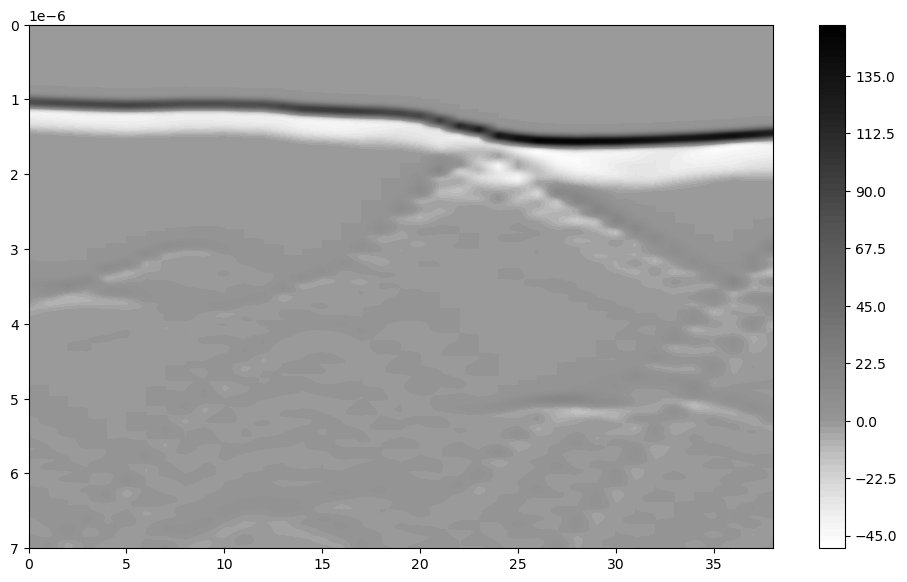

In [14]:
# Method 1 - Data generated per point not saved, radargram not saved
data = fullModel.processData(filename=path_to_demo, crop=[0, 0], outName='new_radargram')

In [15]:
# Method 2 - Data generated per point is saved, radargram saved

if os.path.exists("demoData/points"):
    shutil.rmtree("demoData/points")
path.processData('demoData/sparsePath.gpx', outName = 'demoData/points')
#data = radar.radargram('demoData/points',save = 'demoData/figure')

100% (39 of 39) |#############################################| Time: 0.6166666666666667:379


0

Settings: maxTime = 7.000000000000001e-06, dt = 8e-09, steps = 875
100% (39 of 39) |#############################################| Time: 0.5166666666666667:316
saving


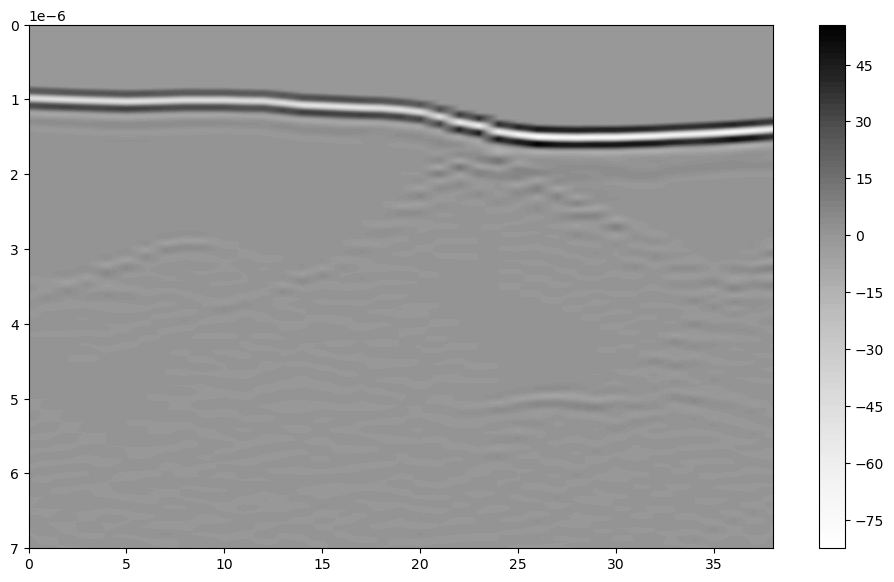

Settings: maxTime = 7.000000000000001e-06, dt = 8e-09, steps = 875
100% (39 of 39) |#############################################| Time: 0.45:2766666666667:259
saving


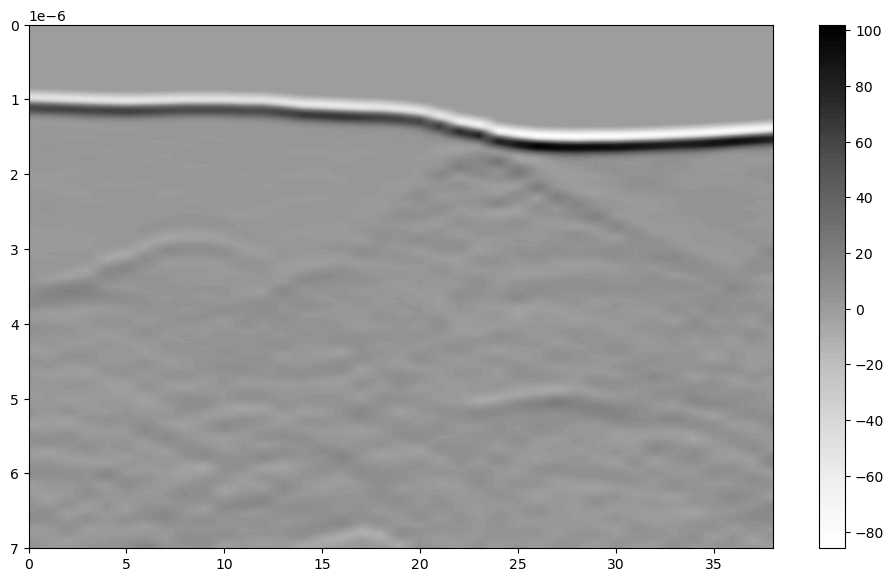

In [16]:
# generate a radargram with bespoke options
from declutter.modelling import waves, backscatter, directivity

data = radar.radargram('demoData/points', \
                      intensityModel=backscatter.rayModel,\
                      directional=directivity.constant,\
                      wave=waves.Sym(),\
                      save = 'demoData/fig1.png')

data = radar.radargram('demoData/points', \
                      intensityModel=backscatter.lambertian,\
                      directional=directivity.broad,\
                      wave=waves.Ricker(),\
                      save = 'demoData/fig2.png')

## Compare the radargrams of slightly varying models

The list of options to use is defined in the compare.py module, and the approach is similar for waves, backscatter or directivity models.

Settings: maxTime = 7.000000000000001e-06, dt = 8e-09, steps = 875
100% (39 of 39) |#############################################| Time: 0.48333333333333334:29
100% (39 of 39) |#############################################| Time: 0.45:27333333333335:26
100% (39 of 39) |#############################################| Time: 0.4666666666666667:282
100% (39 of 39) |#############################################| Time: 0.5166666666666667:319


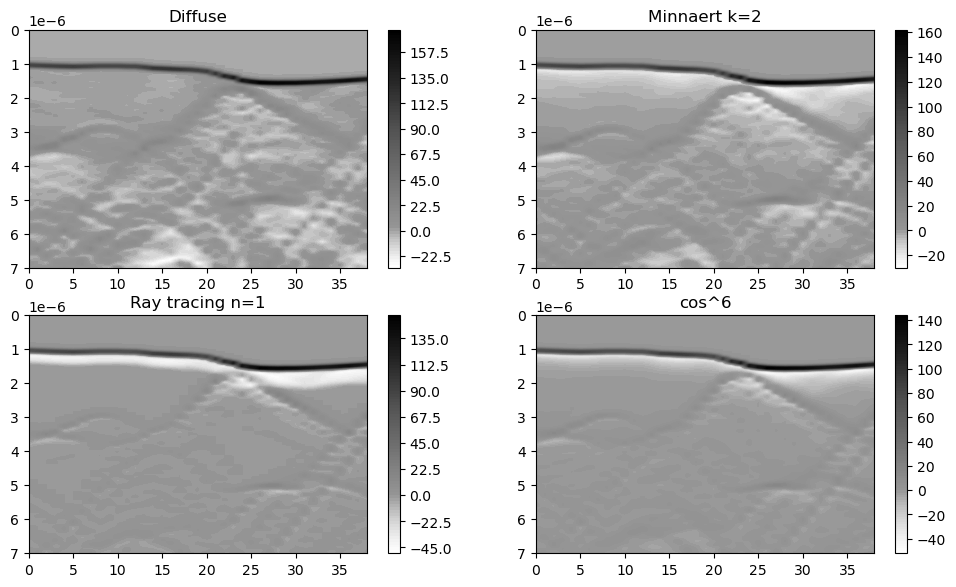

In [17]:
from declutter import compare
out = compare.compareBackscatter("demoData/points")

## Command line help

The cell below displays the help info for each of the command line options.

In [18]:
divider = '\n\n'+'-'*80+'\n\n'
! python -m declutter -h

print(divider)

! python -m declutter load -h

print(divider)

! python -m declutter model -h

print(divider)

! python -m declutter display -h

print(divider)

! python -m declutter config -h

print(divider)

! python -m declutter crop -h



--------------------------------------------------------------------------------




C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe: No module named declutter




--------------------------------------------------------------------------------




C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe: No module named declutter




--------------------------------------------------------------------------------




C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe: No module named declutter




--------------------------------------------------------------------------------




C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe: No module named declutter




--------------------------------------------------------------------------------




C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe: No module named declutter
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\python.exe: No module named declutter
